# Лабораторная работа №6. Линейная регрессия

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


1. Выведете описание набора данных и наименование признаков.

In [15]:
diabetes = datasets.load_diabetes()
print("Описание набора данных:")
print(diabetes.DESCR)
print("\nНаименование признаков:")
print(diabetes.feature_names)
print("\nЦелевая переменная:")
print("Прогрессирование заболевания через год")

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

# Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [17]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print("Первые 5 строк набора данных:")
df.head()

Первые 5 строк набора данных:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [19]:
print("Информация о типах данных:")
print(df.info())
print("\nПроверка на наличие null значений:")
print(df.isnull().sum())
print("\nКатегориальные признаки отсутствуют, все признаки числовые.")

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Проверка на наличие null значений:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Категориальные признаки отсутствуют, все признаки числовые.


# Исследование данных

4. Постройте матрицу корреляции.

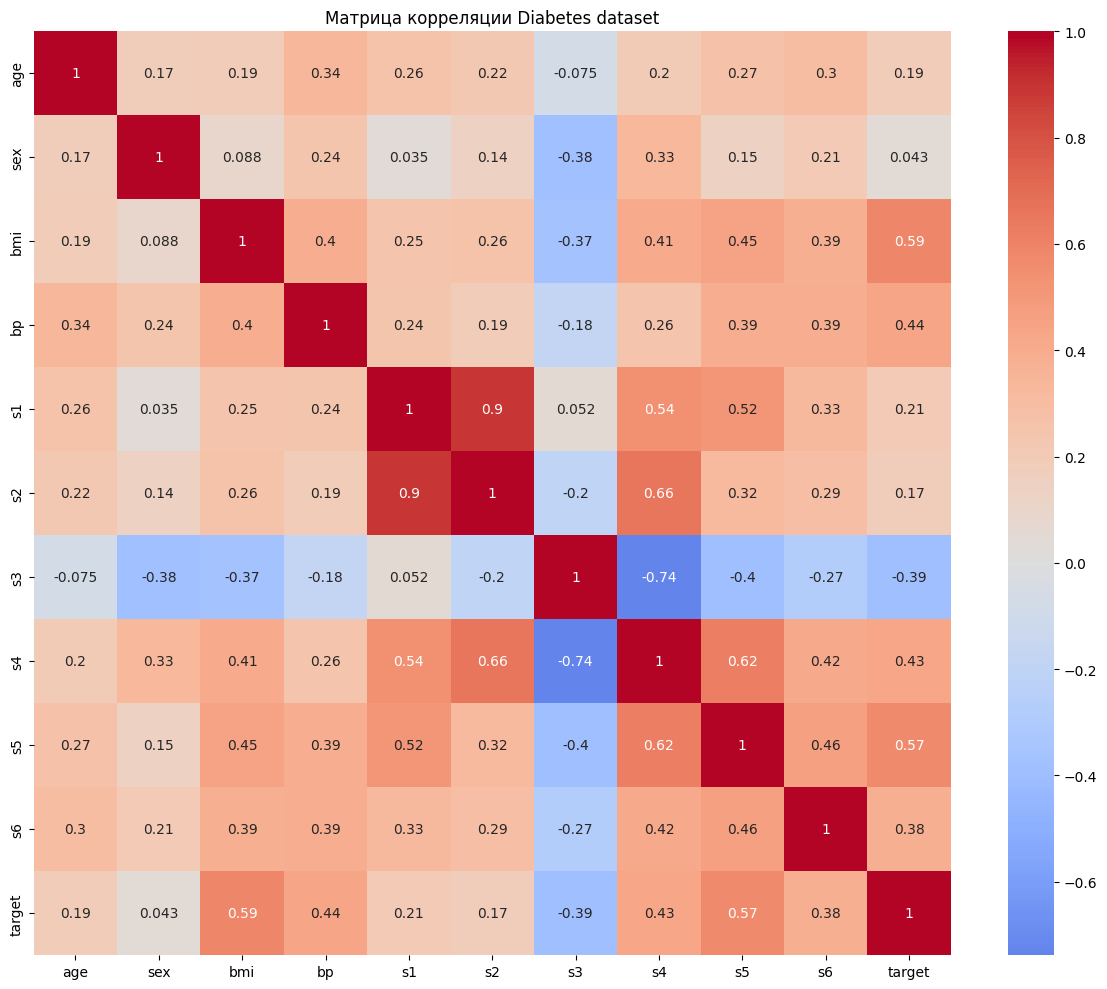

In [21]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции Diabetes dataset')
plt.tight_layout()
plt.show()

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с целевым значением, самый высокий.

Признак с самой высокой корреляцией: индекс массы тела
Коэффициент корреляции: 0.5865


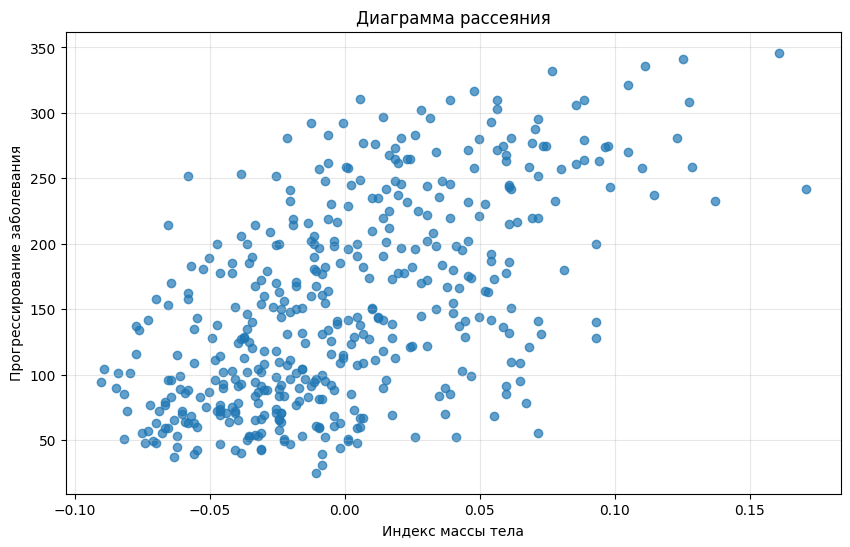

In [13]:
target_correlations = correlation_matrix['target'].drop('target')
max_corr_feature = target_correlations.idxmax()
max_corr_value = target_correlations.max()

print(f"Признак с самой высокой корреляцией: индекс массы тела")
print(f"Коэффициент корреляции: {max_corr_value:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(df[max_corr_feature], df['target'], alpha=0.7)
plt.xlabel('Индекс массы тела')
plt.ylabel('Прогрессирование заболевания')
plt.title(f'Диаграмма рассеяния')
plt.grid(True, alpha=0.3)
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [22]:
top_5_features = target_correlations.nlargest(5).index.tolist()
print("5 признаков с самой высокой корреляцией:")
print(top_5_features)

X = df[top_5_features]
y = df['target']

print(f"\nРазмерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

5 признаков с самой высокой корреляцией:
['bmi', 's5', 'bp', 's4', 's6']

Размерность X: (442, 5)
Размерность y: (442,)


# Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

Обучающая выборка: 331 samples
Тестовая выборка: 111 samples


8. Выполните обучение модели.

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Коэффициенты модели:")
for feature, coef in zip(top_5_features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Свободный член: {model.intercept_:.4f}")

Коэффициенты модели:
bmi: 617.3449
s5: 406.1149
bp: 311.9578
s4: 103.5398
s6: 18.9067
Свободный член: 151.6484


# Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [28]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 52.6639


10. Расчитайте R² (коэффициент детерминации)

In [29]:
r2 = r2_score(y_test, y_pred)
print(f"R² (коэффициент детерминации): {r2:.4f}")

R² (коэффициент детерминации): 0.4984
